#  base de dados imobiliários de Boston

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [174]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import datasets  # FutureWarning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [20]:
data_url = 'https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/Mo%CC%81dulo%2011%20-%20A%CC%81rvores%20II%20(Parte%20I-%20a%CC%81rvore%20de%20regressa%CC%83o)/database/boston.csv'
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data=np.hstack([raw_df.values[::2, :], 
                                  raw_df.values[1::2, :3]]), 
                  columns=columns)

df.to_csv(path_or_buf='boston_clean_data.csv', index=False)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 1. Tratamento

In [21]:
df.shape

(506, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 2.  Matriz de correlação e análise de variáveis explicativas

In [23]:
df.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


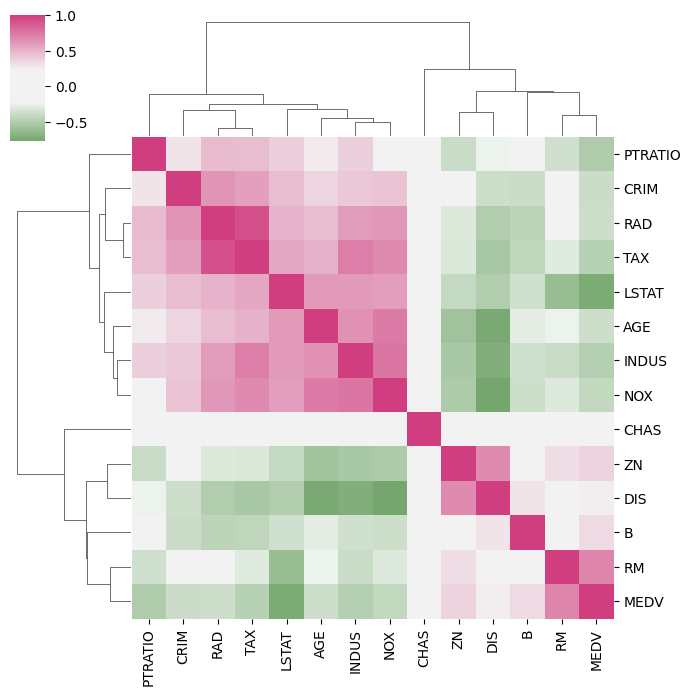

In [24]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(7, 7), center = 0, cmap=cmap)

### 3. Separação Treino e Teste

In [56]:
X = df.drop(columns='MEDV', axis=1)
y = df['MEDV']

In [57]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2402)

### 4. Coeficiente de Determinação por Profundidade e Nº mín:

n_minimo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
profundidade,,,,,,,,,,,,,,,,,,,,
1,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297,0.455297
2,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103,0.739103
3,0.759831,0.789034,0.782656,0.782656,0.766544,0.778404,0.780908,0.780908,0.780908,0.785156,0.777916,0.769576,0.769576,0.769576,0.769576,0.769576,0.769576,0.769576,0.769576,0.769576
4,0.822700,0.816000,0.813099,0.819861,0.805207,0.792486,0.829682,0.817491,0.817491,0.821739,0.814499,0.806160,0.806160,0.806160,0.806160,0.806160,0.806160,0.806160,0.806160,0.806160
5,0.766276,0.809591,0.825018,0.831532,0.796828,0.780368,0.822067,0.832965,0.837109,0.843393,0.828415,0.829028,0.822436,0.810596,0.809095,0.806585,0.805960,0.802828,0.803549,0.813682
6,0.771676,0.823134,0.824147,0.831773,0.802942,0.787706,0.833557,0.839473,0.841212,0.842884,0.826063,0.826391,0.820047,0.811168,0.811226,0.808716,0.804625,0.800435,0.802338,0.810050
7,0.835372,0.813705,0.815834,0.828442,0.796212,0.787968,0.822587,0.831644,0.843666,0.842588,0.827430,0.827491,0.821074,0.810037,0.808176,0.806848,0.804625,0.800435,0.802338,0.810050
8,0.751452,0.807382,0.810525,0.829234,0.792701,0.784150,0.820680,0.829409,0.844890,0.841816,0.827799,0.827491,0.821074,0.810037,0.808176,0.806848,0.804625,0.800435,0.802338,0.810050
9,0.767347,0.810665,0.811145,0.826080,0.790704,0.787718,0.817121,0.826851,0.845091,0.841816,0.827799,0.827491,0.821074,0.810037,0.808176,0.806848,0.804625,0.800435,0.802338,0.810050


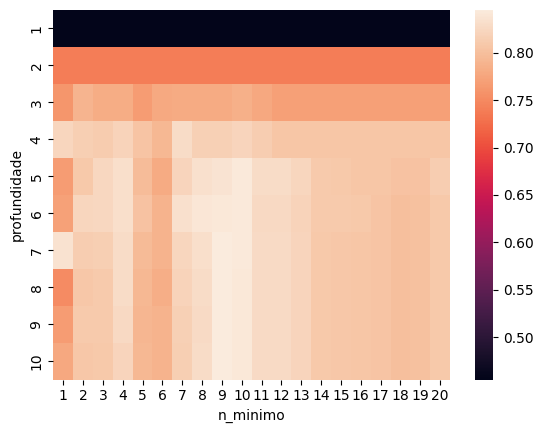

In [60]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 11):
    for j in range(1, 21):
        regr = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=2402)
        regr.fit(X_train, y_train)
        mse = regr.score(X_test, y_test)
        mses.append(mse)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})

sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

* `Maior r-quadrado: max_deph = 7 e min_samples_leaf = 10`

### 5. Analisando MSE/Profundidade

In [110]:
regr1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
regr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2402)

In [111]:
regr2 = DecisionTreeRegressor(max_depth=7, random_state=2402)
regr2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=2402)

In [112]:
regr3 = DecisionTreeRegressor(max_depth=6, random_state=2402)
regr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=2402)

In [79]:
mse_train_1 = mean_squared_error(y_true=y_train, y_pred=regr1.predict(X_train))
mse_test_1 = mean_squared_error(y_true=y_test, y_pred=regr1.predict(X_test))

print(f'MSE Train : {mse_train_1}\nMSE Test: {mse_test_1}')

MSE Train : 1.9216921152518978
MSE Test: 21.412710375661046


In [80]:
mse_train_2 = mean_squared_error(y_true=y_train, y_pred=regr2.predict(X_train))
mse_test_2 = mean_squared_error(y_true=y_test, y_pred=regr2.predict(X_test))

print(f'MSE Train: {mse_train_2}\nMSE Test: {mse_test_2}')

MSE Train: 2.858913936483642
MSE Test: 14.182897739145146


In [113]:
mse_train_3 = mean_squared_error(y_true=y_train, y_pred=regr3.predict(X_train))
mse_test_3 = mean_squared_error(y_true=y_test, y_pred=regr3.predict(X_test))

print(f'MSE Train: {mse_train_3}\nMSE Test: {mse_test_3}')

MSE Train: 4.525456308913936
MSE Test: 19.670431068281058


### 6. Árvore com menor MSE e maior R2

In [114]:
print('Erro Quadrático Médio (MSE):', 
       round(mean_squared_error(y_true=y_train, y_pred=regr1.predict(X_train)), 2))

print('Coeficiente de determinação (R-quadrado):', 
       round(regr1.score(X=X_train, y=y_train), 2))

Erro Quadrático Médio (MSE): 1.92
Coeficiente de determinação (R-quadrado): 0.98


In [115]:
print(f'Melhor árvore:\nÁrvore 1: {regr1}')

Melhor árvore:
Árvore 1: DecisionTreeRegressor(max_depth=8, random_state=2402)


### 5. Predição do valor do imóvel na base de treinamento.

In [116]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=regr1.predict(X_train), 
                columns=['Valor predito do imóvel na base de treinamento'])], axis=1)

,MEDV,Valor predito do imóvel na base de treinamento
0,24.6,23.966667
1,23.8,23.966667
2,12.3,12.400000
3,19.2,21.180000
4,27.9,27.966667
...,...,...
349,32.0,29.257143
350,17.1,17.100000
351,20.4,20.137500
352,19.4,19.033333


### 7. Analisando CCP-Alpha e Impurities

In [84]:
path = regr1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.88323917e-05, 5.64971751e-05, 1.69491525e-04,
        2.25988701e-04, 3.53107345e-04, 5.08474576e-04, 6.77966102e-04,
        6.77966102e-04, 6.92090395e-04, 1.70903955e-03, 1.70903955e-03,
        2.03389831e-03, 3.18267420e-03, 3.25423729e-03, 3.73728814e-03,
        4.08192090e-03, 4.55743879e-03, 4.55743879e-03, 4.76694915e-03,
        4.77401130e-03, 5.20009416e-03, 5.44256121e-03, 6.61252354e-03,
        7.23163842e-03, 7.91902072e-03, 9.94713479e-03, 1.04001883e-02,
        1.50536723e-02, 1.58509887e-02, 1.99246704e-02, 2.46101695e-02,
        2.50894539e-02, 2.61158192e-02, 2.65222850e-02, 2.70529661e-02,
        2.72128060e-02, 3.22269303e-02, 3.24340866e-02, 3.30509259e-02,
        3.56241440e-02, 4.11365348e-02, 4.23631961e-02, 4.61440678e-02,
        4.93304412e-02, 5.03225047e-02, 5.19120763e-02, 5.22622411e-02,
        5.52268447e-02, 6.15254237e-02, 6.17274684e-02, 6.61252354e-02,
        7.00956106e-02, 7.94491525e-02, 8.41058537

Text(0, 0.5, 'Alphas')

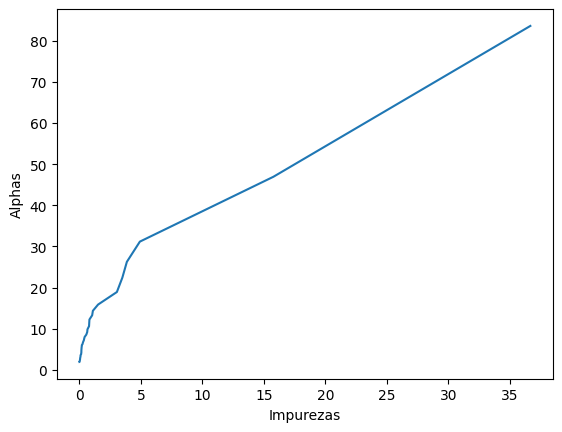

In [86]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.plot(ccp_alphas, impurities)
plt.xlabel("Impurezas")
plt.ylabel("Alphas")

### 8. Melhor valor de CCP-Alpha para a Árvore

In [90]:
regrs = []

for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=2402, ccp_alpha=ccp_alpha)
    regr.fit(X_train, y_train)
    regrs.append(regr)

Text(0, 0.5, 'Profundidade da árvore')

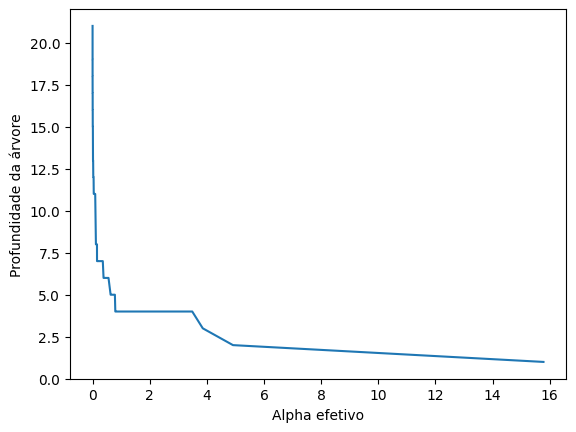

In [94]:
tree_depths = [regr.tree_.max_depth for regr in regrs]
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Alpha efetivo")
plt.ylabel("Profundidade da árvore")

### 9. Analisando MSE/Alpha

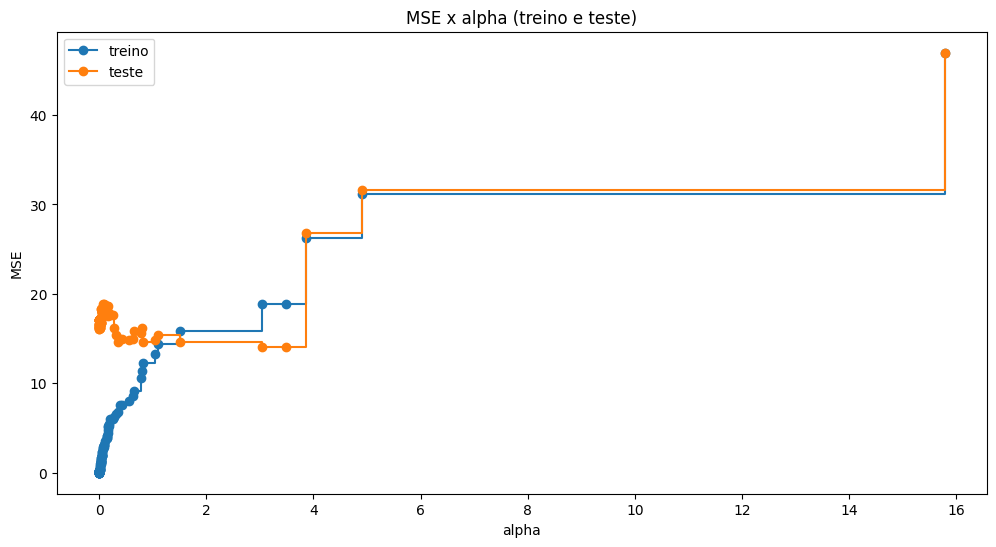

In [169]:
train_scores = [mean_squared_error(y_train , regr.predict(X_train)) for regr in regrs]
test_scores  = [mean_squared_error(y_test  , regr.predict(X_test )) for regr in regrs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha (treino e teste)")

ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")

ax.legend()
plt.show()

In [170]:
table = pd.DataFrame({'alpha': ccp_alphas, 'test_scores': test_scores, 'train_scores': train_scores})

* `MENOR CCP-ALPHA (3.044477) PARA O MENOR MSE (14.058252)`

In [173]:
table.sort_values(by=['test_scores', 'train_scores'])

,alpha,test_scores,train_scores
85,3.044477,14.058252,18.919138
86,3.488233,14.058252,18.919138
73,0.357919,14.566947,6.834382
81,0.812656,14.582596,12.231003
84,1.515934,14.603770,15.874661
...,...,...,...
54,0.084106,18.820013,2.831875
87,3.856790,26.846761,26.264161
88,4.913903,31.585263,31.178063
89,15.780762,46.926825,46.958825


### 10. Árvore Final

In [163]:
regr = DecisionTreeRegressor(max_depth=8, ccp_alpha=3.044477, random_state=2402)
regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=3.044477, max_depth=8, random_state=2402)

In [164]:
mse_train = mean_squared_error(y_true=y_train, y_pred=regr.predict(X_train))
mse_test = mean_squared_error(y_true=y_test, y_pred=regr.predict(X_test))

print(f'MSE Train : {mse_train}\nMSE Test: {mse_test}')

MSE Train : 18.91913785437539
MSE Test: 14.058251669005191


In [165]:
print('Erro Quadrático Médio (MSE):', 
       round(mean_squared_error(y_true=y_train, y_pred=regr.predict(X_train)), 2))

print('Coeficiente de determinação (R-quadrado):', 
       round(regr.score(X=X_train, y=y_train), 2))

Erro Quadrático Médio (MSE): 18.92
Coeficiente de determinação (R-quadrado): 0.77


In [166]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=regr.predict(X_train), 
                columns=['Valor predito do imóvel (treino)'])], axis=1)

,MEDV,Valor predito do imóvel (treino)
0,24.6,21.834783
1,23.8,21.834783
2,12.3,15.189516
3,19.2,21.834783
4,27.9,28.177778
...,...,...
349,32.0,28.177778
350,17.1,15.189516
351,20.4,21.834783
352,19.4,15.189516


### 7. Visualize esta árvore.

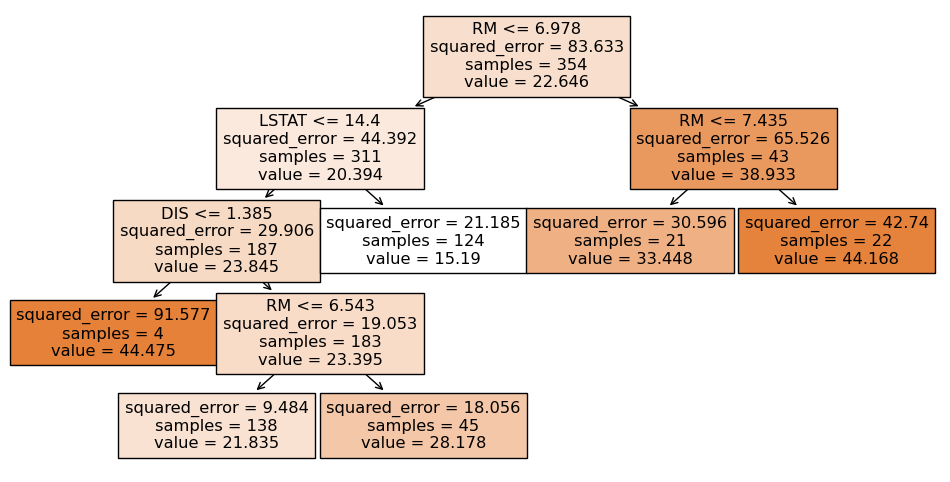

In [168]:
plt.rc('figure', figsize=(12,6))

tree.plot_tree(decision_tree=regr, 
               feature_names=X.columns.to_list(), 
               filled=True);